In [1]:
from pyquil.gates import *
from pyquil.quil import Program
from pyquil.latex import to_latex, display

# Basic Functionality: LaTeX generation and inline IPython display

There are two main functions exposed: 
- `to_latex` produces LaTeX source code for producing figures.
- `display` renders to an `IPython.display.Image` object. This requires that `pdflatex` and Imagemagick's `convert` are installed and available in the user's path.

In [8]:
prog = Program("X 0\n CNOT 0 1\n H 1")
print(to_latex(prog))

\documentclass[convert={density=300,outext=.png}]{standalone}
\usepackage[margin=1in]{geometry}
\usepackage{tikz}
\usetikzlibrary{quantikz}
\begin{document}
\begin{tikzcd}
\lstick{\ket{q_{0}}} & \gate{X} & \ctrl{1} & \qw & \qw \\
\lstick{\ket{q_{1}}} & \qw & \targ{} & \gate{H} & \qw
\end{tikzcd}
\end{document}


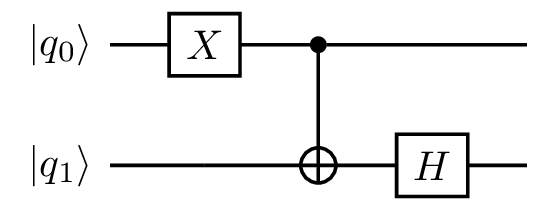

In [9]:
# extra kwargs are passed are passed straight to `IPython.display.Image`
display(prog, width=300)

# Controlling display through DiagramSettings

Certain options may be controlled via a `DiagramSettings` object, which may be provided to either `to_latex` or `display`. For more info, read the docstrings on `DiagramSettings`!

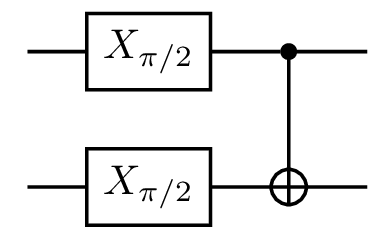

In [7]:
from pyquil.latex import DiagramSettings

prog = Program("RX(pi/2) 0\n RX(pi/2) 1\n CNOT 0 1\n DAGGER X 1")
settings = DiagramSettings(label_qubit_lines=False, # no leading q_0, q_1
                           abbreviate_controlled_rotations=True) # RX(pi/2) -> X_{pi/2}
display(prog, settings, width=300)

# Controlling layout via gate groups

In general, we do not give much explicit control over circuit layout. One exception is if a subcircuit should be grouped together (for example, to label this within the larger figure). The mechanism exposed for this is via two new pragmas:
- `PRAGMA LATEX_GATE_GROUP <name>?` marks a start of a block of instructions for rendering as a group. If a string `<name>` is provided, this will serve as a label in the resulting diagram.
- `PRAGMA END_LATEX_GATE_GROUP` marks the end of a grouped block of instructions.

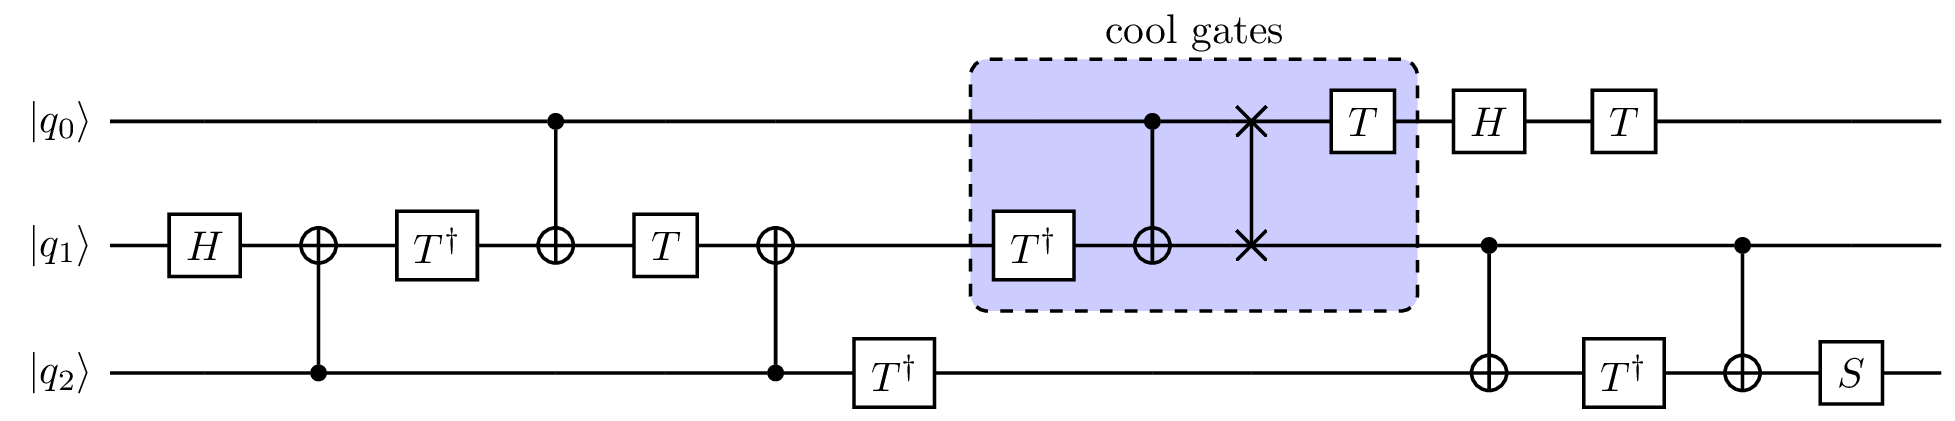

In [4]:
prog = Program("""H 1
CNOT 2 1
DAGGER T 1
CNOT 0 1
T 1
CNOT 2 1
PRAGMA LATEX_GATE_GROUP "cool gates"
DAGGER T 1
CNOT 0 1
SWAP 0 1
T 0
PRAGMA END_LATEX_GATE_GROUP
DAGGER T 2
CNOT 1 2
H 0
DAGGER T 2
CNOT 1 2
T 0
S 2
""")
display(prog)